In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [2]:
df_ori = pd.read_csv('./data/wine.csv' , header= None)
df = df_ori 

In [3]:
X = df.iloc[:, :12]
y = df.iloc[:, 12]
X.shape

(6497, 12)

In [4]:
6497*0.8

5197.6

In [5]:
6497*0.2

1299.4

In [6]:
X = df.iloc[:, :12]
y = df.iloc[:, 12]

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, shuffle=True)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5197, 12)
(1300, 12)
(5197,)
(1300,)


In [ ]:
# 과적합 확인


In [22]:
modelpath = "./model/all3/{epoch:02d}-{val_accuracy:.4f}.keras"

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [24]:
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [25]:
model3 = Sequential()
model3.add( Dense(36, 
                input_dim=12,
                activation='relu'))
model3.add( Dense(12, activation='relu'))
model3.add( Dense(8, activation='relu'))
model3.add( Dense(1, activation='sigmoid'))
model3.compile( 
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history3 = model3.fit( X_train, y_train,
                    epochs=2000,
                    batch_size=500, 
                    validation_split=0.25, 
                    callbacks=[checkpointer] )
# validation_split 확인 필요.


Epoch 1/2000
1/8 [==>...........................] - ETA: 3s - loss: 13.7740 - accuracy: 0.2340
Epoch 1: saving model to ./model/all3\01-0.2438.keras
8/8 [==============================] - 1s 26ms/step - loss: 10.1538 - accuracy: 0.2504 - val_loss: 7.0128 - val_accuracy: 0.2438
Epoch 2/2000
1/8 [==>...........................] - ETA: 0s - loss: 6.8629 - accuracy: 0.2480
Epoch 2: saving model to ./model/all3\02-0.2454.keras
8/8 [==============================] - 0s 9ms/step - loss: 5.3908 - accuracy: 0.2510 - val_loss: 2.5137 - val_accuracy: 0.2454
Epoch 3/2000
1/8 [==>...........................] - ETA: 0s - loss: 2.4445 - accuracy: 0.2740
Epoch 3: saving model to ./model/all3\03-0.8208.keras
8/8 [==============================] - 0s 9ms/step - loss: 1.0205 - accuracy: 0.5517 - val_loss: 0.3368 - val_accuracy: 0.8208
Epoch 4/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.3623 - accuracy: 0.7980
Epoch 4: saving model to ./model/all3\04-0.8192.keras
8/8 [===================

In [ ]:
history3

In [ ]:
history3.history
# 키가 있어서 df 변경

In [ ]:
history3_df = pd.DataFrame(data=history3.history)

In [ ]:
history3_df.head()

In [ ]:
y_loss = history3_df['loss']
y_vloss = history3_df['val_loss']
# save series

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
len(y_loss)

In [ ]:
x_len = np.arange(len(y_loss))

In [ ]:
plt.plot(x_len, y_vloss, "o", c="red", markersize=2 , label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2 , label='Trainset_loss')
plt.legend(loc=1)
# plt.xlim(0, 10)
plt.ylim(0, 0.2)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
modelpath = "./model/all4/{epoch:02d}-{val_accuracy:.4f}.keras"


In [13]:
# patience=20 검증셋의 오차가 20번 이상 낮아지지 않을 경우 학습종료 하라.

In [26]:
early_stoping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1,  save_best_only=True,  save_format='h5')

In [27]:
model4.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 체크포인트 콜백 정의 (save_format 지정)
checkpointer = ModelCheckpoint(filepath='./model/all4/{epoch:02d}-{val_loss:.4f}.h5', 
                               save_best_only=True, 
                               verbose=1 )

# 얼리 스토핑 콜백 정의
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# 모델 훈련
history4 = model4.fit(X_train, y_train,
                      epochs=2000,
                      batch_size=500,
                      verbose=1,
                      validation_split=0.25,
                      callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
1/8 [==>...........................] - ETA: 4s - loss: 0.0339 - accuracy: 0.9880
Epoch 1: val_loss improved from inf to 0.06086, saving model to ./model/all4\01-0.0609.h5
8/8 [==============================] - 1s 17ms/step - loss: 0.0900 - accuracy: 0.9733 - val_loss: 0.0609 - val_accuracy: 0.9815
Epoch 2/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0812 - accuracy: 0.9820
Epoch 2: val_loss did not improve from 0.06086
8/8 [==============================] - 0s 5ms/step - loss: 0.0684 - accuracy: 0.9800 - val_loss: 0.0723 - val_accuracy: 0.9731
Epoch 3/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0369 - accuracy: 0.9860
Epoch 3: val_loss did not improve from 0.06086
8/8 [==============================] - 0s 5ms/step - loss: 0.0681 - accuracy: 0.9772 - val_loss: 0.0650 - val_accuracy: 0.9792
Epoch 4/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0474 - accuracy: 0.9880
Epoch 4: val_loss improved from 0.06086 to 0.05682, saving

c:\anaconda3\envs\mldltest1\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 8ms/step - loss: 0.0580 - accuracy: 0.9843 - val_loss: 0.0567 - val_accuracy: 0.9815
Epoch 6/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0587 - accuracy: 0.9840
Epoch 6: val_loss did not improve from 0.05667
8/8 [==============================] - 0s 6ms/step - loss: 0.0587 - accuracy: 0.9828 - val_loss: 0.0579 - val_accuracy: 0.9823
Epoch 7/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0709 - accuracy: 0.9780
Epoch 7: val_loss did not improve from 0.05667
8/8 [==============================] - 0s 5ms/step - loss: 0.0569 - accuracy: 0.9841 - val_loss: 0.0587 - val_accuracy: 0.9808
Epoch 8/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0527 - accuracy: 0.9860
Epoch 8: val_loss improved from 0.05667 to 0.05581, saving model to ./model/all4\08-0.0558.h5
8/8 [==============================] - 0s 6ms/step - loss: 0.0591 - accuracy: 0.9854 - val_loss: 0.0558 - val_accuracy: 0.9808
Epoch 9/2000
1/8 [==>.

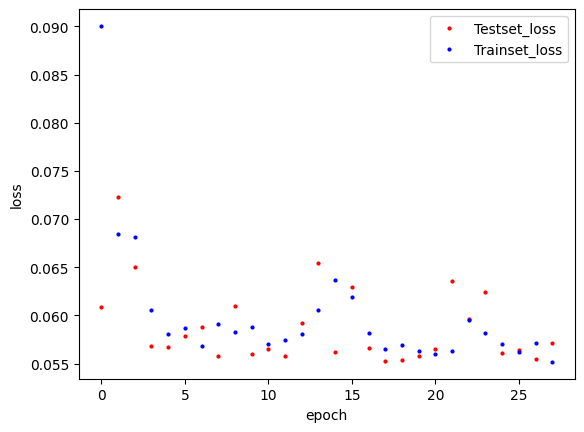

: 

In [39]:
history4_df = pd.DataFrame(data=history4.history)
y_loss = history4_df['loss']
y_vloss = history4_df['val_loss']
history4_df = pd.DataFrame(data=history4.history)
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2 , label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2 , label='Trainset_loss')
plt.legend(loc=1)
# plt.xlim(0, 10)
# plt.ylim(0, 0.2)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
